# CM2015 Programming with Data CW1
________________________________________________________________________________________________________________

# Data Analysis on HDB Room rental details in Singapore

## Table of Contents
<div id="toc_container">
        <ul class="toc_list">
            <li>1.0 <a href="#section1">Introduction</a>
                <ul>
                    <li>1.1 <a href="#section1.1">Dataset Justification</a>
                    <li>1.2 <a href="#section1.2">Ethics Considerations</a>
                </ul>
                <br>
            <li>2.0 <a href="#section2">Importing the necessary libraries</a>
            <li>3.0A <a href="#section3A">Extracting data from '99co.com'**</a>
                <ul>
                    <li>3.0B <a href="#section3B">Reading from file: parsed 99co data</a>
                    <li>3.1 <a href="#section3.1">Generate 99co Dataframe with pandas</a>                        
                    <li>3.2 <a href="#section3.2">Data Cleaning</a>                           
                </ul>
                <br>
            <li>4.0A <a href="#section4A">Extracting data from 'ilivesg.com'**</a>
                <ul>
                    <li>4.0B <a href="#section4B">Reading from file: parsed ilivesg data</a>
                    <li>4.1 <a href="#section4.1">Generate ilivesg Dataframe with pandas</a>                        
                    <li>4.2 <a href="#section4.2">Data Cleaning</a>                        
                </ul>
                <br>
            <li>5.0 <a href="#section5">Concatenate dataframes</a>
            <li>6.0 <a href="#section6">Carousell's 2019 HDB Room rental report</a>
            <li>7.0 <a href="#section7">Geopy API</a>                
            <li>8.0 <a href="#section8">Summary</a>
            <li>9.0 <a href="#section9">Further Development</a>                
        </ul>
</div>

<i><a href=''>3.0A/4.0A**</a> - if unable to process, skip to 3.0B or 4.0B respectively to read previously saved data from file instead</i>

## ***NOTE: 3.0A and 4.0A are commented out due to long web parsing delay. Data reading starts from 3.0B and 4.0B from previously saved files.

<a id='section1'></a>
## 1.0 Introduction

This research paper studies the current market for <b>HDB Common room rentals</b> in Singapore. There are few existing datasets and research topics regarding this field of study, and it seems to be rather unexplored. However, i find this field to be highly relevant for myself, and other international students.

Many international students come to Singapore to pursue undergraduate education. Looking for a suitable accomodation will pose as a challenge for these students, as it will be their home for the duration of their study. Personally, I plan to rent a room when i start working full-time, to learn to live more independently. By gathering data on market prices, one can get to understand and estimate costs of accomodation, to better plan for the future and set aside costs.  

The goal of the project is to analyse overall standings of rental fees and locations, to narrow down options in choosing a suitable room for rent. The final agenda of this project is to identify the most desired room rental based in <b>Woodlands</b>. 

##### The following agendas will be explored:
* Popularity of rentals based on location/region
* Median prices of overall rentals
* Median prices per region
* Median price comparison with 2019 report
* Cheapest/most desired rates
* Overview of listings in x region
    * Pins on map based on price range (e.g green for cheap, orange for mid-range, red for expensive)
        - show overall locations with price filter
        - MRT convenience or other form of amenities
* Comparison of overall prices between online property platforms


#### For the scope of the work, the following factors will not be considered:
* Condo/Landed room rentals
* Master room rentals
* Misc fees (utilities)
* Restrictions (gender, visiting, cooking etc)
* dimensions of room

<a id='section1.1'></a>
## 1.1 Dataset Justification

There are no existing public APIs for data in this field of study. Hence, for this project, I will be acquiring my data sets from the following two sites through web scraping means:
1. https://www.99.co/singapore/rent
2. https://www.ilivesg.com

The reason why i have selected these two property websites is because each caters to a different group. 99co is a more sophisticated and refined marketplace, and also one of the biggest in Singapore. The listing prices through this platform is generally expected to be higher, due to a majority of them being posted by property agents. Contrary, ilivesg boasts a no agent fee for its listings, hence, listing prices are generally expected to be slightly lower.

Having a mix of these 2 different platforms allows for a wider spectrum of available rooms for analysis, and the study towards prices on a agent/non-agent based platform.

<a id='section1.2'></a>
## 1.2 Ethics Consideration

Given that i will obtain my data through web scraping, it may pose some ethical challenges. The following points will explain the moral grounds that i abide by for an ethically sound web scraping.
1. The data that is gathered publicly available to anyone, property price analysis have been done by governments, agents and individuals, with respect to the identified data and references.
2. Regarding usage of data, it is used with the purpose of creating new data, and not duplicating or distributing it.
3. Content obtained will not be regarded as my own.
4. 'robot.txt' rules are abided and in no means bypassed.
5. Research summaries will not have any dangerous or harmful assumptions. Summaries include purely analysis of market prices for personal references. 
6. Content will have no potential implications and will not present any potential threats.

<a id = 'section2'></a>
## 2.0 Importing the necessary libraries

In [1]:
import requests
import bs4
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

<a id='section3A'></a>
## 3.0A Extracting data from '99co.com'
* This property web platform is one of the biggest in Singapore, with a refined marketplace. Due to its higher-end nature and the availability of agencies, the prices tend to be higher, and with a more dominant range of listings due to its popularity.
* Commented out for smooth run using saved parsed data from '99co_data.json'

### Retrieving individual listing hrefs

In [2]:
# print("Getting request to server")
# # Filter settings (params) to be passed to GET request
# building_type = 'hdb'
# rental_type = 'room'
# room_type = 'common'
# page_num = 1
# page_size=50

# # necessary params to navigate to web page with applied filters
# params = {
#     'main_category': building_type,
#     'rental_type': rental_type,
#     'room_type': room_type,
#     'page_num': page_num,
#     'page_size': page_size
# }

# # base_url used later
# base_url = 'https://www.99.co'
# url = 'https://www.99.co/singapore/rent'
# res = requests.get(url, params=params)
# soup = bs4.BeautifulSoup(res.text,'html.parser')

# # test for response
# # print(res)


# # =================================================================================
# # getting the max no. of pages
# # page number contained in 'button' role in \<a> tag
# pages = soup.find_all('a', attrs = {'role': 'button'})
# max_page = 0

# for page in pages:
#     # check for digits in strings and max page no.
#     if page.text.isnumeric() and int(page.text) > max_page:
#         # cast to int
#         max_page = int(page.text)
        
        
# # =================================================================================
# # ### Individual listing hrefs from all pages
# # * More detailed information about the rent such as region, address etc, thereby the need to navigate each listing one by one (results in high processing time)
# # * Loop thru pages ---> retrieve \<a> containing href link
# # #### Note that there is a crawl delay - 3s
# # <i>Due to long processing time, max_page will not be used in this scenario. Max number of pages will be capped at __ .
# # The extraction process takes some time (#~approx 500 requests). Wait for the print statement execution.</i>

# list_hrefs = []
# print("Extracting in progress, please wait...")

# # set page limit, ensure that within range of max number of pages
# pages_to_loop = 10
# if max_page < pages_to_loop:
#     pages_to_loop = max_page

# for page in range(1,pages_to_loop+1):

#     try:
#         # get all rent listing url
#         # pass in page number to params
#         params['page_num'] = page 
#         # get new request for mass listings per page
#         res = requests.get(url, params=params)
#         soup = bs4.BeautifulSoup(res.text,'html.parser') 
#         # find all listings id
#         listings = soup.find_all(class_="_2kH6B")

#         # loop thru listings per page
#         for list in listings:

#             # get listing id href
#             href = list.a['href'] 
#             list_hrefs.append(href)    
            
#     #error handling
#     except:
#         print("Error: Page not found.")
#         print("Page may have expired.")
#         print("Last page: "+page)
#         break
    
# print('done')
# list_hrefs[:1]

### Retrieve rent details from each individual listing

In [3]:
# # Cap number of listings to reduce scraping time due to crawl delay
# # 100 listings takes about 1 minute to crawl
# num_of_listings = 100

# co_rent_details = []
# counter = 0
# print("Extracting in progress, please wait...")

# for href in list_hrefs:
    
#     # counter to track number of listings crawled
#     if counter < num_of_listings:
        
#         # get indiv listing with base_url
#         # get new request for indiv listings (base_url + href)
#         res = requests.get(base_url + href)
#         soup = bs4.BeautifulSoup(res.text,'html.parser') 

#         try:
#             # get listing details        
#             address = soup.find(class_='_1p49F').h1.text # Room in ____/Common room in ___/Studio in ____
#             region = soup.find(class_='_1p49F').span.text.strip() # Pasir ris/tampines (D18)
#             room_type = soup.find(class_='_3gg1z').p.text # Common room/Master room
#             building_type = soup.find(class_='_1p49F').a.text # 'HDB for rent'
#             price = soup.find(id='price').h2.text # $650/mo

#             # json to store details per listing
#             details = {
#                 'address': address,
#                 'region': region,
#                 'room_type': room_type,
#                 'building_type': building_type,
#                 'price': price
#             }
#             # list to store all rent listing jsons (all listings)
#             co_rent_details.append(details)
#             # increment counter
#             counter+=1

#         #error handling
#         except AttributeError:
#             print("Error: There is no such attribute.")
#             print("Listing may have expired.")
#             print("Last list: " + href)
#             break

# print("done")
# co_rent_details[:1]

### Write to json file

In [4]:
# # write data to file in case web scraping does not work (e.g region blocked)
# with open('99co_data.json', 'w') as f:
#     json.dump(co_rent_details, f)

<a id='section3B'></a>
## 3.0B Reading from file: parsed 99co data
* Start from here if 3.0A Extracting data from '99co' does not work (e.g region blocked)

In [5]:
f = open('99co_data.json', 'r')
co_rent_details = json.load(f)

In [6]:
co_rent_details[:1]

[{'address': 'Room in 170 Gangsa Road',
  'region': 'Bukit Batok / Bukit Panjang / Choa Chu Kang (D23)',
  'room_type': 'Common Room',
  'building_type': 'HDB for Rent',
  'price': '$700/mo'}]

<a id='section3.1'></a>
## 3.1 Generate 99co Dataframe with pandas

In [7]:
# generate dataframe and rename columns
co_df = pd.json_normalize(co_rent_details)
co_df.columns=['Address', 'Region', 'Room-type', 'Building-type', 'Price']
# remove duplicates
co_df = co_df.drop_duplicates()
# reset index after removing dupes
co_df = co_df.reset_index(drop=True)

In [8]:
co_df.tail(2)

,Address,Region,Room-type,Building-type,Price
97,Room in 2 Hougang Avenue 3,Hougang / Punggol / Sengkang (D19),Common Room,HDB for Rent,$310/mo
98,Room in 146 Pasir Ris Street 11,Pasir Ris / Tampines (D18),Common Room,HDB for Rent,$280/mo


<a id='section3.2'></a>
## 3.2 Data Cleaning
#### Address: e.g 'Room in 121 Mcnair Road' --> '121 Mcnair Road'

In [9]:
# Use NLTK tools to remove a custom list of stop words (to remove unwanted words in details)
import nltk
from nltk.tokenize import word_tokenize 

In [10]:
# 'co' shortform for '99co'
co_stopwords = [
    'room', 'in', 'studio', 'apartment', 'landed', 
    'condo', 'master', 'common', 'for', 'rent', 
    'executive','house','terraced','shophouse'
]

In [11]:
# remove co_stopwords in address
# e.g 'Room in 121 Mcnair Road' --> '121 Mcnair Road'

for address in co_df['Address']:
    tokens = word_tokenize(address) 
    # check if exists in co_stopwords
    tokenized = [words for words in tokens if not words.lower() in co_stopwords] 
    # rejoin tokens with exclusions
    clean_address = ' '.join(tokenized)
    co_df['Address'].replace(address,clean_address,inplace=True)

In [12]:
co_df.head(1)

,Address,Region,Room-type,Building-type,Price
0,170 Gangsa Road,Bukit Batok / Bukit Panjang / Choa Chu Kang (D23),Common Room,HDB for Rent,$700/mo


#### Building-type cleaning: e.g 'HDB for rent' --> 'HDB'

In [13]:
# remove co_stopwords in building type, only keep the property type
for building_type in co_df['Building-type']:
    tokens = word_tokenize(building_type) 
    tokenized = [words for words in tokens if not words.lower() in co_stopwords] 
    clean_building_type = ' '.join(tokenized)
    co_df['Building-type'].replace(building_type, clean_building_type, inplace=True)

#### Price cleaning: e.g $600 --> 600

In [14]:
# get numerical values only and cast as numpy(int) type
co_df['Price'] = co_df['Price'].replace('\D+', '', regex = True).astype(int)
co_df.head(1)

,Address,Region,Room-type,Building-type,Price
0,170 Gangsa Road,Bukit Batok / Bukit Panjang / Choa Chu Kang (D23),Common Room,HDB,700


#### Region cleaning: e.g 'Eunos/Geylang/Paya Lebar (D12)' --> 'Eunos/Geylang/Paya Lebar'

In [15]:
# Remove district number for string comparison later on
for region in co_df['Region']:
    # remove special characters and '(DXX)'
    clean_region = re.sub(r'\(.*?\)', '', region)
    co_df['Region'].replace(region, clean_region, inplace=True) # .replace() replaces ALL 
co_df.head(1)

,Address,Region,Room-type,Building-type,Price
0,170 Gangsa Road,Bukit Batok / Bukit Panjang / Choa Chu Kang,Common Room,HDB,700


<a id='section3.3'></a>
## 3.3 Datagrams for 99co Dataframe
### Price distribution: 99co

<AxesSubplot:title={'center':'General rent prices'}>

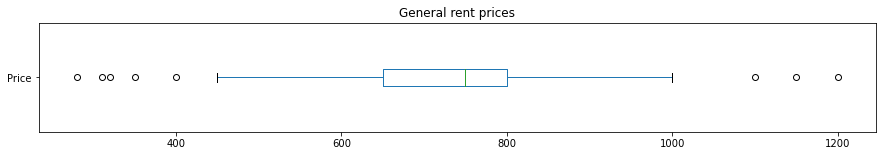

In [16]:
co_df['Price'].plot(kind='box',y='Price',figsize=(15,2), vert=False, title='General rent prices')

### Region distribution: 99co

<AxesSubplot:title={'center':'Region distribution'}>

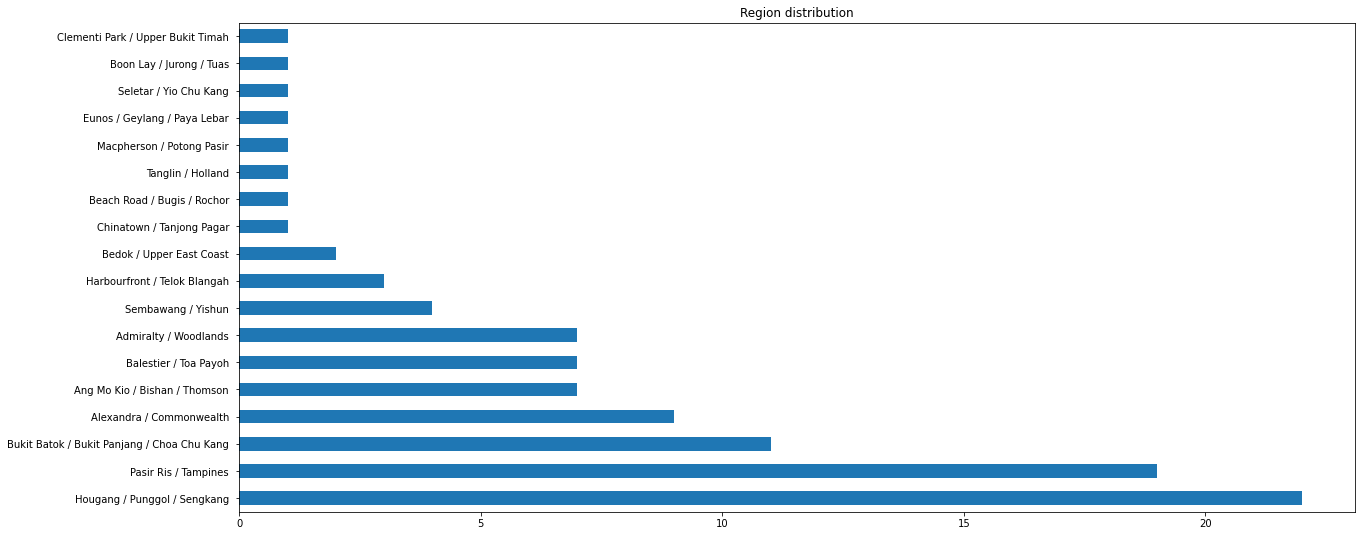

In [17]:
co_df['Region'].value_counts().plot(kind='barh', title='Region distribution', ylabel='',figsize=(20,9))

In [18]:
co_df[co_df['Region'].str.contains('Woodlands')].Price.median()

750.0

<a id='section4A'></a>
## 4.0A Extracting data from 'ilivesg.com'

In [19]:
# print("Getting request from server..")
# # Filter settings (params) to be passed to GET request
# rtype = 1 #[1]-room, [2]-whole unit
# ptype_r2 = 2 #[1-condo, [2]-HDB, [3]-landed
# page = 0 #[0]-page 1

# params = {
#     'rtype': rtype,
#     'ptype_r2': ptype_r2,
#     'page': page
# }

# # base_url used later
# base_url = 'https://www.ilivesg.com'
# url = 'https://www.ilivesg.com/rooms-for-rent'
# res = requests.get(url, params = params)
# soup = bs4.BeautifulSoup(res.text,'html.parser') 
# # test for positive response
# # print(res)


# # # =================================================================================
# # ### Individual listing hrefs from x pages
# # * Individual listing page contains more detailed information about the rent such as region, address etc
# # * Loop thru pages ---> retrieve \<a> containing href link
# # #### Note that there is a crawl delay - 10s
# # <i>Due to long processing time, max_page will not be used in this scenario. Max number of pages will be capped at 15 .
# # The extraction process takes some time (#~approx 500 requests). 
# #     Wait for the print statement execution.</i>
# list_hrefs = []
# print("Extracting in progress, please wait...")

# for page in range(15):

#     try:
#         # get all listing url
#         # pass in page number to params
#         params['page'] = page  
#         # get new request based on page num
#         res = requests.get(url, params=params)
#         soup = bs4.BeautifulSoup(res.text,'html.parser') 
#         # find all listing url tag
#         listings = soup.find_all(class_='thumb')

#         # loop thru listings per page
#         for list in listings:

#             # get indiv listing id href
#             href = list.a['href'] 
#             list_hrefs.append(href)    

#     #error handling
#     except:
#         print("Error: Page not found.")
#         print("Page may have expired.")
#         print("Last page: "+page)
#         break
    
# print('done')
# list_hrefs[:2]

### Rent details from each individual listing
<i> Same columns as 99co, so that a merge will be possible later on. </i>

In [20]:
# # Cap number of listings to reduce scraping time due to crawl delay
# # takes about 1 minute to crawl
# num_of_listings = 100

# ilivesg_rent_details = []
# counter = 0
# print("Extracting in progress, please wait...")

# for href in list_hrefs:
    
#     # counter to track no. of listings crawled
#     if counter < num_of_listings:
#         # get indiv listing with (base_url + listing href)
#         res = requests.get(base_url + href)
#         soup = bs4.BeautifulSoup(res.text,'html.parser') 

#         try:
#             # get listing details        
#             list_details = soup.find_all(class_= 'item-value')
#             # index details (of list_details):
#             # [0]-rent price
#             # [1]-agent fee
#             # [2]-room type (common room)
#             # [3]-live in owner
#             # [4]-aircon
#             # [5]-building type (HDB)
#             # [6]-region
#             # [7]-address
#             # [8]-wifi

#             price = list_details[0].text
#             room_type = list_details[2].text
#             building_type = list_details[5].text
#             region = list_details[6].text
#             # remove 'singapore' and postal code
#             full_address = list_details[7].text.strip()
#             address = full_address.split(',')[0]

#             # json to store indiv listing details
#             details = {
#                 'address': address,
#                 'region': region,
#                 'room_type': room_type,
#                 'building_type': building_type,
#                 'price': price
#             }
#             # list to store ALL listings' rent details
#             ilivesg_rent_details.append(details)
#             # increment counter
#             counter+=1

#         except:
#             print("Error: There is no such attribute.")
#             print("Listing may have expired.")
#             print("Last list: " + href)
#             break

# print("done")
# ilivesg_rent_details[:1]

### Write to json file

In [21]:
# # write data to file in case web scraping does not work (e.g region blocked)
# with open('ilivesg_data.json', 'w') as f:
#     json.dump(ilivesg_rent_details, f)

<a id='section4B'></a>
## 4.0B Reading from file: parsed ilivesg data
* Start from here if 4.0A Extracting data from 'ilivesg' does not work (e.g region blocked)

In [22]:
f = open('ilivesg_data.json', 'r')
ilivesg_rent_details = json.load(f)

In [23]:
ilivesg_rent_details[:1]

[{'address': '19 Hougang Ave 3',
  'region': 'Hougang',
  'room_type': 'Common Room',
  'building_type': 'HDB',
  'price': 'S$ 590'}]

<a id='section4.1'></a>
## 4.1 Generate ilivesg Dataframe with pandas

In [24]:
# generate dataframe and rename columns
ilivesg_df = pd.json_normalize(ilivesg_rent_details)
ilivesg_df.columns=['Address', 'Region', 'Room-type', 'Building-type', 'Price']
# remove duplicates
ilivesg_df = ilivesg_df.drop_duplicates()
# reset index after removing dupes
ilivesg_df = ilivesg_df.reset_index(drop=True)

In [25]:
ilivesg_df.head(2)

,Address,Region,Room-type,Building-type,Price
0,19 Hougang Ave 3,Hougang,Common Room,HDB,S$ 590
1,Pending Road,Bukit Panjang,Common Room,HDB,S$ 800


<a id='section4.2'></a>
## 4.2 Data Cleaning
* Most of the extracted data is already clean based off the website
* Only price needs to be cleaned

#### Price cleaning: e.g $600 --> 600

In [26]:
# get numerical values only and cast as numpy(int) type
ilivesg_df['Price'] = ilivesg_df['Price'].replace('\D+', '', regex = True).astype(int)

In [27]:
ilivesg_df.head(2)

,Address,Region,Room-type,Building-type,Price
0,19 Hougang Ave 3,Hougang,Common Room,HDB,590
1,Pending Road,Bukit Panjang,Common Room,HDB,800


<a id='section4.3'></a>
## 4.3 Datagrams for ilivesg Dataframe
### Price distribution: ilivesg

<AxesSubplot:title={'center':'General rent prices'}>

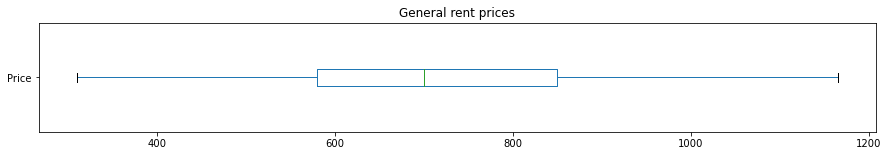

In [28]:
ilivesg_df['Price'].plot(kind='box',y='Price',figsize=(15,2), vert=False, title='General rent prices')

### Region distribution: ilivesg

<AxesSubplot:title={'center':'Region distribution'}>

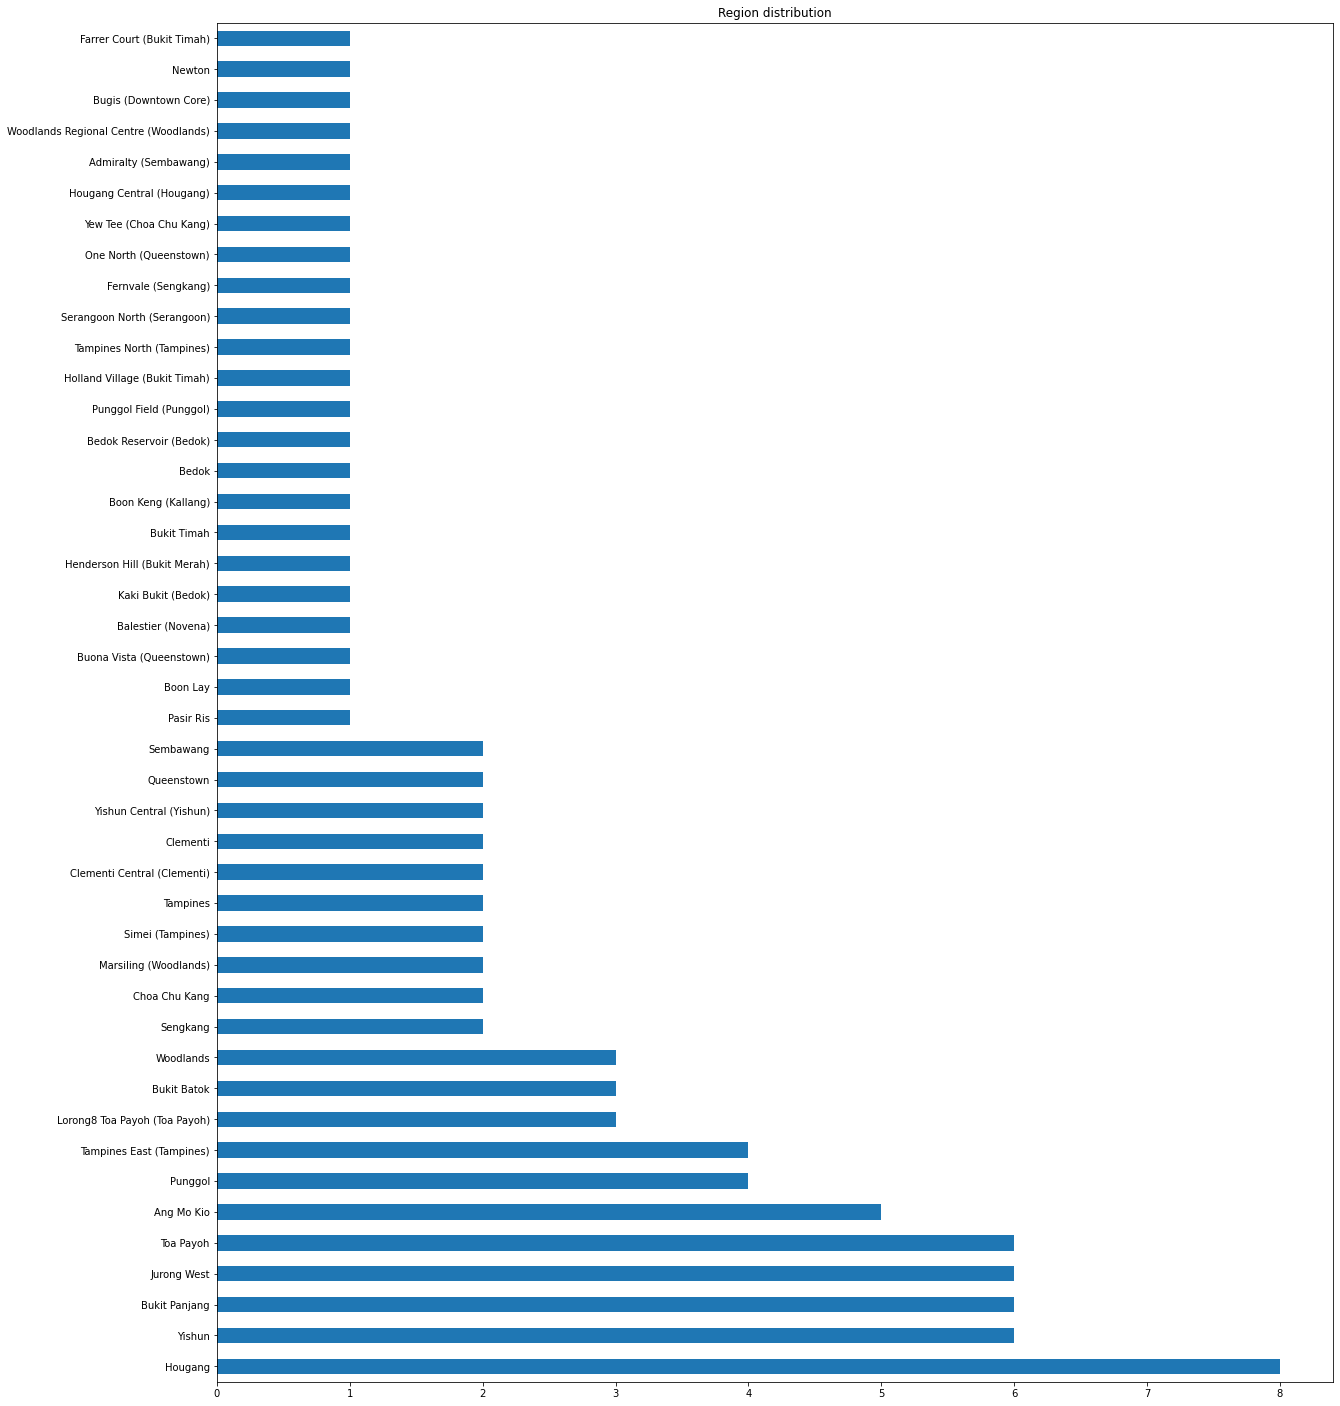

In [29]:
ilivesg_df['Region'].value_counts().plot(kind='barh', title='Region distribution', ylabel='',figsize=(20,25))

In [30]:
ilivesg_df[ilivesg_df['Region'].str.contains('Ang Mo Kio')].Price.median()

800.0

<a id='section5'></a>
## 5.0 Concatenate Dataframes (99co & ilivesg)

In [31]:
# vertical concat for more detailed analysis
concat_df = pd.concat([co_df, ilivesg_df], axis=0)
concat_df = concat_df.reset_index(drop=True)

In [32]:
concat_df

,Address,Region,Room-type,Building-type,Price
0,170 Gangsa Road,Bukit Batok / Bukit Panjang / Choa Chu Kang,Common Room,HDB,700
1,319B Anchorvale Drive,Hougang / Punggol / Sengkang,Common Room,HDB,800
2,635 Woodlands Ring Road,Admiralty / Woodlands,Common Room,HDB,700
3,666A Yishun Avenue 4,Sembawang / Yishun,Common Room,HDB,800
4,780D Woodlands Crescent,Admiralty / Woodlands,Common Room,HDB,750
...,...,...,...,...,...
191,106 Jalan Dusun,Balestier (Novena),Master Room,HDB,850
192,601A 601a Punggol Drive,Punggol,Common Room,HDB,730
193,422 Ang Mo Kio Avenue 3,Ang Mo Kio,Common Room,HDB,450
194,20B Punggol Field,Punggol Field (Punggol),Common Room,HDB,600


<a id='section5.1'></a>
## 5.1 Datagrams for Concat Dataframe
### Price distribution: overall

<AxesSubplot:title={'center':'General rent prices'}>

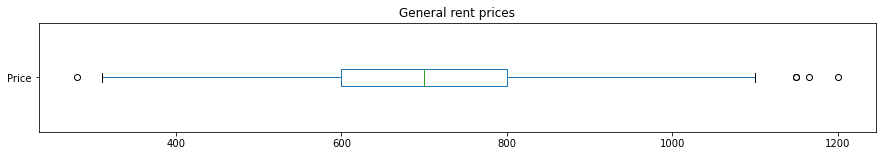

In [33]:
concat_df['Price'].plot(kind='box',y='Price',figsize=(15,2), vert=False, title='General rent prices')

### Comparison of overall prices between online property platforms 99co and ilivesg
* ilivesg has a lower median price

<AxesSubplot:title={'center':'Median Overall rental Prices'}>

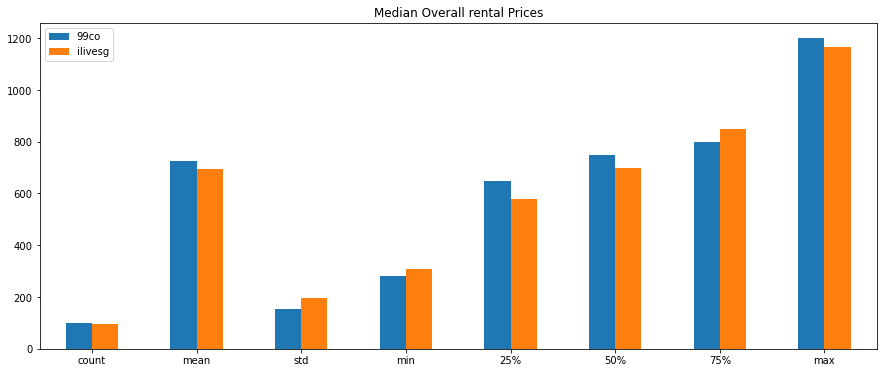

In [34]:
median_overall_plt = co_df['Price'].describe().compare(ilivesg_df['Price'].describe())
median_overall_plt.columns = ['99co', 'ilivesg']
median_overall_plt.plot(kind = 'bar', title = 'Median Overall rental Prices', figsize=(15,6), rot=0)

<a id='section6'></a>
## 6.0 Carousell's 2019 Average Rental Prices: HDB Rooms 
* The most recent historical dataset on rental prices was by Carousell in 2019, which was a rough estimate for the prices in 2020.
* Based on this dataset, a comparison will be done to current market standings in 2021
* src = https://blog.carousell.com/property/hdb-room-rental-cost/

### Generate Dataframe for Carousell's report

In [35]:
avgRent_df=pd.read_csv('carousell2019hdbrooms.csv')
avgRent_df.head(2)

,Town,Common Room,Master Room
0,Ang Mo Kio,$600,$910
1,Bedok,$600,$910


<a id='section6.1'></a>
## 6.1 Median Price Comparison

### Calculate median prices of [99co + ilivesg dataframe] based on Town/Region

In [36]:
# Get values from dataframe
towns = []
# retrieve Common Room prices based on town
for t in avgRent_df['Town']:
    # get values from avgRent_df 
    # json to store details
    town = {
        'town': t,
        'price_sum': 0,
        'counter': 0
    }
    # list to store all Common Room prices based on town
    towns.append(town)

In [37]:
# Calculate sum of common room prices of [99co + ilivesg dataframe] based on town/region

#list[1] - region
#list[4] - price

# only compare 'Common Room' room types
# get values from concat_df
for list in concat_df[concat_df['Room-type'] == ('Common Room')].values:
    for t in towns:
        # Update towns[] numbers for calculation
        if t['town'] in list[1]:
            t['price_sum'] += list[4] #sum of total listing prices (for region)
            t['counter']+=1 #no. of listings

In [38]:
# Calculate median prices of [99co + ilivesg dataframe] based on town/region

for t in towns:
    #check for empty cell
    if t['counter'] != 0:
        #calculate price increment
        median_price = t['price_sum']/t['counter']
        #create new key/value in list
        t['median_price']= median_price

In [39]:
towns[:2]

[{'town': 'Ang Mo Kio',
  'price_sum': 6130,
  'counter': 9,
  'median_price': 681.1111111111111},
 {'town': 'Bedok', 'price_sum': 3580, 'counter': 5, 'median_price': 716.0}]

### Generate Dataframe for Median prices for [99co and ilivesg]

In [40]:
median_toMerge = pd.json_normalize(towns)
# remove excess column (sum of all prices)
median_toMerge = median_toMerge.drop(columns = 'price_sum')
median_toMerge.columns=['Town', 'No. of listings', 'Median Price']

In [41]:
median_toMerge.head(2)

,Town,No. of listings,Median Price
0,Ang Mo Kio,9,681.111111
1,Bedok,5,716.000000


### Merge all median prices together (2019 report, 99co and ilivesg)

In [42]:
#merge on column 'town'
median_df = median_toMerge.merge(avgRent_df, on='Town')
#remove 'Master Room' column (only taking 'Common Room' for easy comparison)
median_df = median_df.drop(columns = ['Master Room'])
#rearrange columns
median_df = median_df[['Town','No. of listings', 'Common Room', 'Median Price']]

In [43]:
median_df.head(3)

,Town,No. of listings,Common Room,Median Price
0,Ang Mo Kio,9,$600,681.111111
1,Bedok,5,$600,716.000000
2,Bishan,7,$660,757.142857


<a id='section6.2'></a>
## 6.2 Data Cleaning

In [44]:
# reaplce all NaN values with 0, remove invalid entries
median_df = median_df.fillna(0)

#### Price Cleaning: e.g $600 --> 600

In [45]:
# get numerical values only and cast as numpy(int) type
median_df[['Common Room', 'Median Price']] = median_df[['Common Room','Median Price']].replace('\D+', '', regex = True).astype(int)

In [46]:
# cast values to numpy int for same type comparison
median_df[['Common Room','Median Price']] = median_df[['Common Room','Median Price']].astype(np.int)

In [47]:
median_df.head(2)

,Town,No. of listings,Common Room,Median Price
0,Ang Mo Kio,9,600,681
1,Bedok,5,600,716


### Top 5 rent listings & Lowest overall median price based on region

In [48]:
list_pop_df = median_df.sort_values('No. of listings', ascending=False).head(5).reset_index(drop=True)
list_pop_df = list_pop_df.style.set_table_attributes("style='display:inline'").set_caption("Top 5 rent listings based on Region")
display(list_pop_df)

low_median = median_df[median_df['Median Price'] != 0].sort_values('Median Price', ascending=True).head(5).reset_index(drop=True)
low_median = low_median.style.set_table_attributes("style='display:inline'").set_caption("Top 5 lowest rent prices")
display(low_median)

,Town,No. of listings,Common Room,Median Price
0,Hougang,29,550,668
1,Punggol,27,520,669
2,Tampines,26,580,723
3,Sengkang,25,520,663
4,Pasir Ris,20,550,728


,Town,No. of listings,Common Room,Median Price
0,Queenstown,4,750,470
1,Serangoon,1,630,500
2,Choa Chu Kang,14,500,630
3,Sembawang,7,520,632
4,Bukit Batok,13,550,636


<a id='section6.3'></a>
## 6.3 Percentage and price comparison

In [49]:
# calculation for percent and value difference for [99co + ilivesg] and carousell's median prices
price_changes=[]
percent_changes=[]

for median in median_df.values:
    median_price = median[3] # all listings
    common_price = median[2] # carousell

    # check for divide by 0 error
    if median_price != 0:
        price_diff = median_price - common_price
        percent_diff = ((median_price/common_price * 100 - 100) )

    # if no listing avail, set to 0
    else:
        price_diff = 0
        percent_diff = 0

    price_changes.append(price_diff)
    percent_changes.append(percent_diff)

In [50]:
# insert new columns to dataframe
median_df['Change'] = price_changes
median_df['Change (%)'] = percent_changes

# round to 1 decimal place for percent change
median_df['Change (%)'] = median_df['Change (%)'].round(1)

Highlight prices that dropped
* <i>code referenced from https://www.geeksforgeeks.org/highlight-the-negative-values-red-and-positive-values-black-in-pandas-dataframe/</i>

In [51]:
# highlight negative changes with green text (means price has dropped)
def highlight_neg(n):
    if n.dtype == np.object:
        is_negative = [False for _ in range(n.shape[0])]
    else:
        is_negative = n < 0
    return ['color: green;' 
            if cell else 'color:black' 
                for cell in is_negative]

### Percentage difference between 2019 median prices and now
* green text indicates price decrease

In [52]:
# highlights negative percentage in green: price decrease
median_df.style.apply(highlight_neg)

,Town,No. of listings,Common Room,Median Price,Change,Change (%)
0,Ang Mo Kio,9,600,681,81,13.500000
1,Bedok,5,600,716,116,19.300000
2,Bishan,7,660,757,97,14.700000
3,Bukit Batok,13,550,636,86,15.600000
4,Bukit Merah,0,750,0,0,0.000000
5,Bukit Panjang,17,490,660,170,34.700000
6,Central,4,780,677,-103,-13.200000
7,Choa Chu Kang,14,500,630,130,26.000000
8,Clementi,5,690,682,-8,-1.200000
9,Geylang,1,660,700,40,6.100000


### Price changes for each region (percentage)

<AxesSubplot:title={'center':'Region Price changes'}, ylabel='Change (%)'>

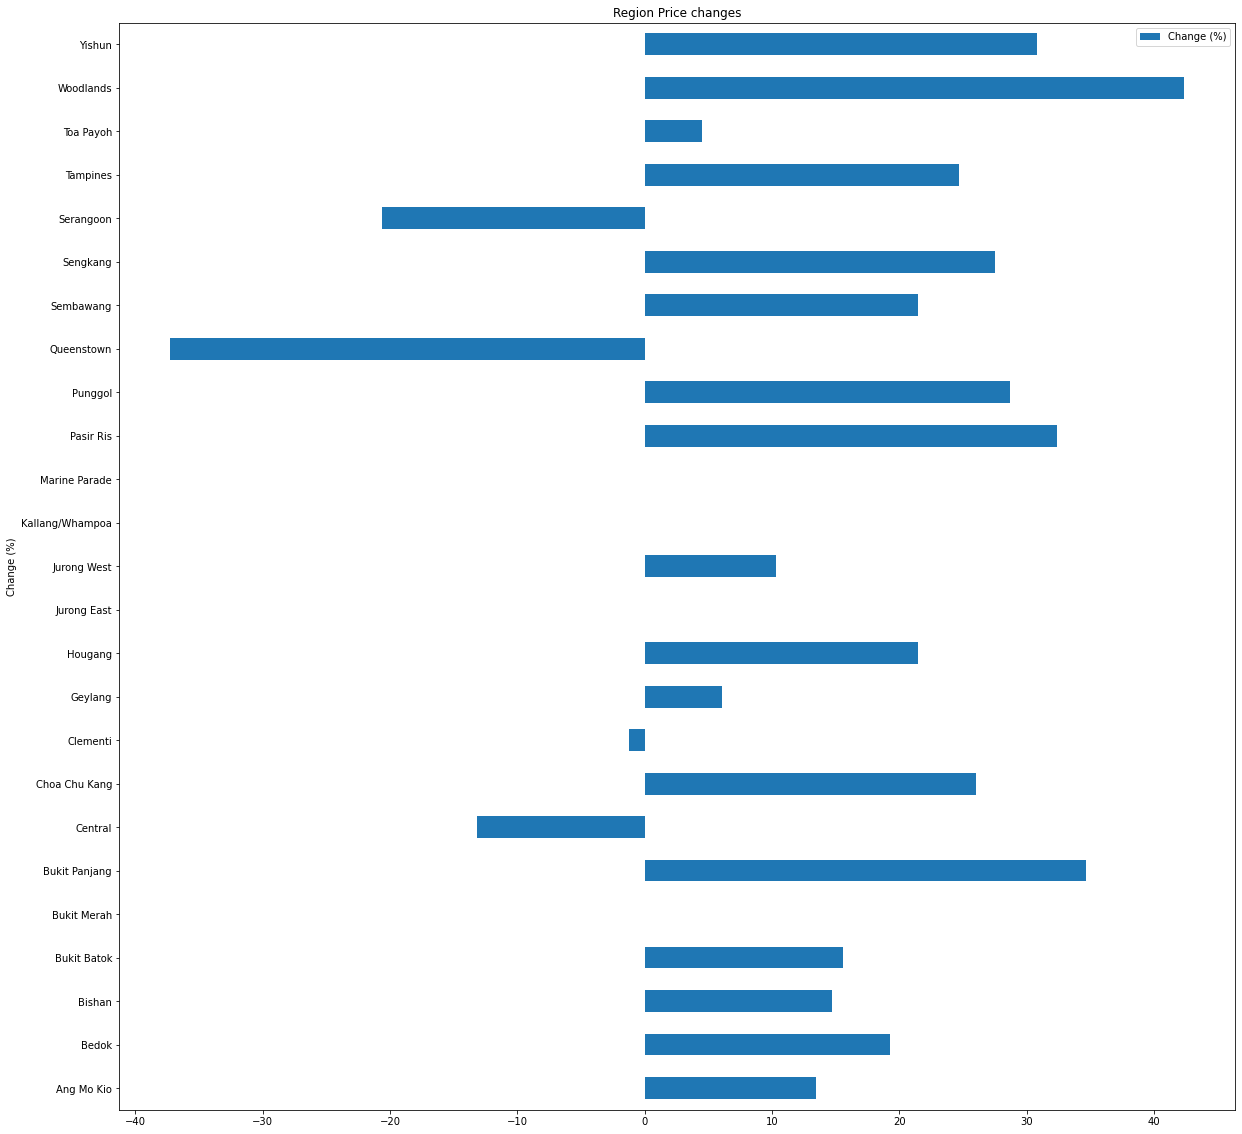

In [53]:
percent_change_plt = median_df[['Town','Change (%)']].set_index('Town')
percent_change_plt.plot(kind='barh', title='Region Price changes', xlabel='Change (%)',figsize=(20,20))

### Median prices per region (comparison between 2019 median prices and now)

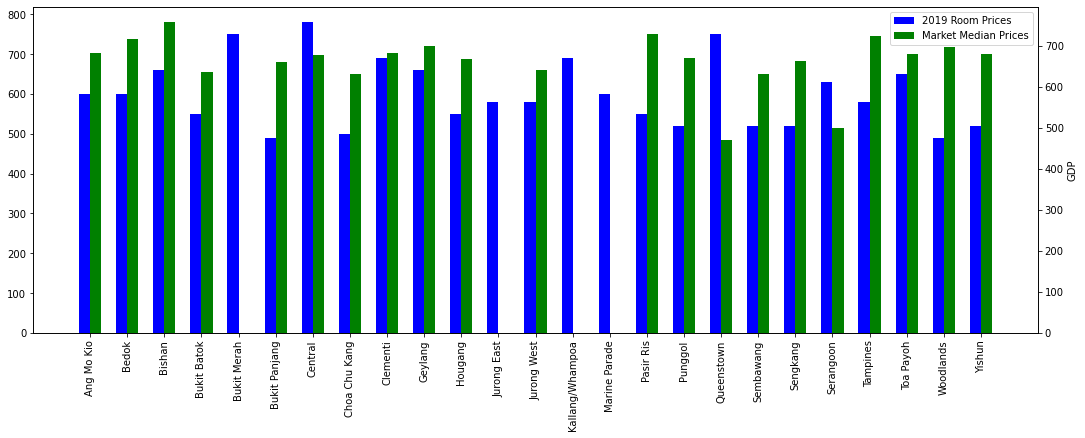

In [54]:
fig,ax = plt.subplots(figsize=(18,6))
x = np.arange(25)
ax1 = plt.subplot(1,1,1)
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective country names.
plt.xticks(x + w /2, median_df['Town'], rotation='vertical')
pop =ax1.bar(x, median_df['Common Room'], width=w, color='b', align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()
#We have calculated GDP by dividing gdpPerCapita to population.
gdp =ax2.bar(x + w, median_df['Median Price'], width=w,color='g',align='center')
#Set the Y axis label as GDP.
plt.ylabel('GDP')
#To set the legend on the plot we have used plt.legend()
plt.legend([pop, gdp],['2019 Room Prices', 'Market Median Prices'])
#To show the plot finally we have used plt.show().
plt.show()

<a id='section7'></a>
## 7.0 Geopy

In [55]:
# pip install folium
# pip install geopy

In [109]:
import folium 
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [100]:
# create mapping object (OpenStreetMap API)
geolocator = Nominatim(user_agent="mee")

* Due to the high number of listings, additional filters will be added to reduce the amount of processing needed.
* Location would be set to: ___Woodlands___
* Mrt will be pinned onto the map as well to be able to access distance from rent.

### Retrieve Dataframe data for specified region (USE MEDIAN_DF??)

In [101]:
select_region = 'Woodlands'
region_df = concat_df[concat_df['Region'].str.contains(select_region)]
region_df = region_df.reset_index(drop=True)

In [102]:
region_df

,Address,Region,Room-type,Building-type,Price
0,635 Woodlands Ring Road,Admiralty / Woodlands,Common Room,HDB,700
1,780D Woodlands Crescent,Admiralty / Woodlands,Common Room,HDB,750
2,647 Woodlands Ring Road,Admiralty / Woodlands,Common Room,HDB,600
3,686B Woodlands Drive 73,Admiralty / Woodlands,Common Room,HDB,800
4,784C Woodlands Rise,Admiralty / Woodlands,Common Room,HDB,600
5,512 Woodlands Drive 14,Admiralty / Woodlands,Common Room,HDB,800
6,854 Woodlands Street 83,Admiralty / Woodlands,Common Room,HDB,800
7,18 Marsiling Lane,Marsiling (Woodlands),Common Room,HDB,350
8,835 Woodlands Street 83,Woodlands,Master Room,HDB,900
9,714 Woodlands Drive 70,Woodlands,Common Room,HDB,750


In [112]:
# test for null
# retry if timeout (too many requests in a short time frame)

print('loading...')
for ad in region_df['Address'][:15]:
    loc = geolocator.geocode(ad)
    if loc == None:
        print('error')
        break
            
print('done')

loading...
done


### Assign coordinates and price to be able to used for geopy mapping 

In [113]:
# set limit due to free use of OpenStreet (limits number of queries at a given time) 
rent_markers = 15

In [114]:
print('loading...')
coords=[]
counter=0

for ad in region_df[['Address','Price']].values:
    
    # counter to keep track of no. of markers
    if(counter < rent_markers):
        # [0] - address
        # [1] - price
        address = ad[0]
        # get coordinates (lat/long)
        loc = geolocator.geocode(address)
        # check for null
        if loc != None:
            coord = {
                'address': address,
                'lat': loc.latitude, 
                'long': loc.longitude,
                'price': ad[1]
            }
        coords.append(coord)
        counter+=1
    else:
        print('counter has reached max limit')
        break
        
print('done')

loading...
done


### Base map generation and MRT marker

In [115]:
select_coords = [1.4382, 103.7890] # Woodlands
sgmap = folium.Map(select_coords,zoom_start = 15)

In [116]:
# blue icon for mrt marker
woodlands_mrt = [1.4371239317978408, 103.78635238247789]

marker = folium.Marker(location = woodlands_mrt, 
popup = 'Woodlands MRT',
icon = folium.Icon(color='blue')).add_to(sgmap)

### Create filtered markers and icons on local map

In [117]:
# Colour code markers based on price
# Green: <550
# Orange: <750
# Red: >=750
def icon_colour(price):
    if(price < 550):
        return 'green'
    elif(price < 750):
        return 'orange'
    else:
        return 'red'

In [118]:
# get all coordinates from listings' address and mark on map
for c in coords:
    marker = folium.Marker(location = [c['lat'], c['long']], 
    popup = c['address'],
    icon = folium.Icon(color=icon_colour(c['price']))).add_to(sgmap)

print('done')

done


<a id='section8'></a>
## 8.0 Summary
* Overview of rent listings in Woodlands

In [119]:
sgmap

In [63]:
median_df[median_df['Town']=='Woodlands'].

,Town,No. of listings,Common Room,Median Price,Change,Change (%)
23,Woodlands,12,490,698,208,42.4


In [92]:
woodlands_median = int(median_df[median_df['Town']=='Woodlands']['Median Price'].values[0])
overall_median = int(median_df['Median Price'].median())

* Comparison of woodlands median price with current overall

In [98]:
print("Woodlands Median Price: $" + str(woodlands_median))
print("Overall Median Price: $" + str(overall_median))
print("Percentage variance: " + str(int(woodlands_median/overall_median * 100-100)) + "%")

Woodlands Median Price: $698
Overall Median Price: $668
Percentage variance: 4%


* 2019 --> now changes

In [104]:
median_df.describe().T['mean']

No. of listings     10.240
Common Room        600.400
Median Price       555.560
Change              59.960
Change (%)          12.076
Name: mean, dtype: float64

Overview on price distribution in specific region:
trend of property and price distribution 
* are the cheaper properties cheaper because they are further from MRT?
* is there a micro region where there are more rents?
* how are the properties distributed across this region?

<a id='section9'></a>
## 9.0 Further development ideas (FYP)

* Include different room-types and property-types into analysis
    * Room types: Master room
    * Property types: Condo/Landed/Studio
* Consider additional factors for deciding a room, such as area of room and price per sqft.
* Analyse the spread of prices amongst region with population margin in Singapore, look for a relation between the median prices in a particular region and population within that region.
* Layout dengue clusters on map and include as an additional deciding factor 
* Additional factors such as distance to MRT and other amenities (mall)